In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib

In [4]:
data = pd.read_csv(r"D:\Heart_Disease_Project\data\heart_disease_data_selected_features.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  212 non-null    float64
 1   oldpeak   212 non-null    float64
 2   slope     212 non-null    float64
 3   ca        212 non-null    float64
 4   age       212 non-null    float64
 5   cp        212 non-null    float64
 6   restecg   212 non-null    float64
 7   target    212 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.4 KB


In [7]:
for col in data.columns :
    print (f"Value counts for {col}:\n{data[col].value_counts()}\n")


Value counts for trestbps:
trestbps
-0.463223    1
 0.976548    1
-0.372059    1
-1.185181    1
-0.681931    1
            ..
 0.621788    1
-0.227917    1
 0.924338    1
 0.614080    1
 0.378702    1
Name: count, Length: 212, dtype: int64

Value counts for oldpeak:
oldpeak
 0.547891    1
 0.688257    1
-0.799993    1
-1.049897    1
-1.308244    1
            ..
-0.946210    1
 1.138417    1
-0.366055    1
-0.557388    1
 0.449524    1
Name: count, Length: 212, dtype: int64

Value counts for slope:
slope
 0.158878    1
 0.710004    1
-0.102173    1
 0.640474    1
 0.235492    1
            ..
 1.369422    1
-0.209287    1
-0.748396    1
-0.742865    1
 1.245741    1
Name: count, Length: 212, dtype: int64

Value counts for ca:
ca
 0.387367    1
 0.241151    1
-0.209963    1
-0.399843    1
 0.015283    1
            ..
-0.070386    1
-0.561703    1
 0.572065    1
 0.413897    1
 0.775354    1
Name: count, Length: 212, dtype: int64

Value counts for age:
age
-3.822996    1
 0.029805    1


In [5]:
X = data.drop(columns=['target']) 

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0.5, 1.0, 'Elbow Method For Optimal k')

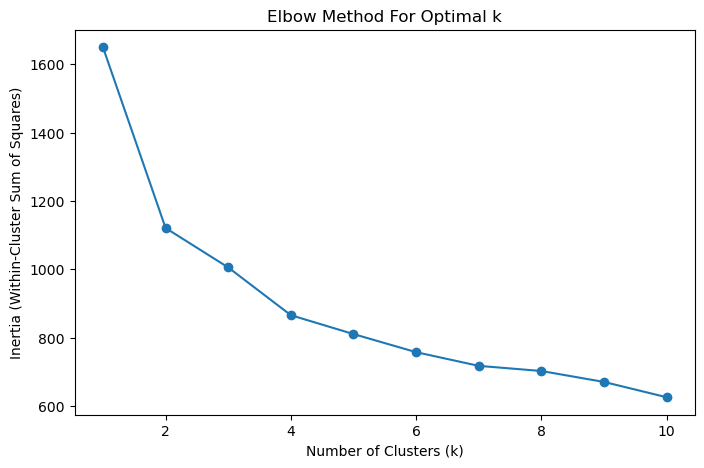

In [6]:
# Apply elbow method to get best n_clusters

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')

In [12]:
# train the model with best n_clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# save the model
import joblib
model_path = r"D:\Heart_Disease_Project\models\kmeans_model.pkl"
joblib.dump(kmeans, model_path)
print(f"Model saved to {model_path}")

Model saved to D:\Heart_Disease_Project\models\kmeans_model.pkl


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


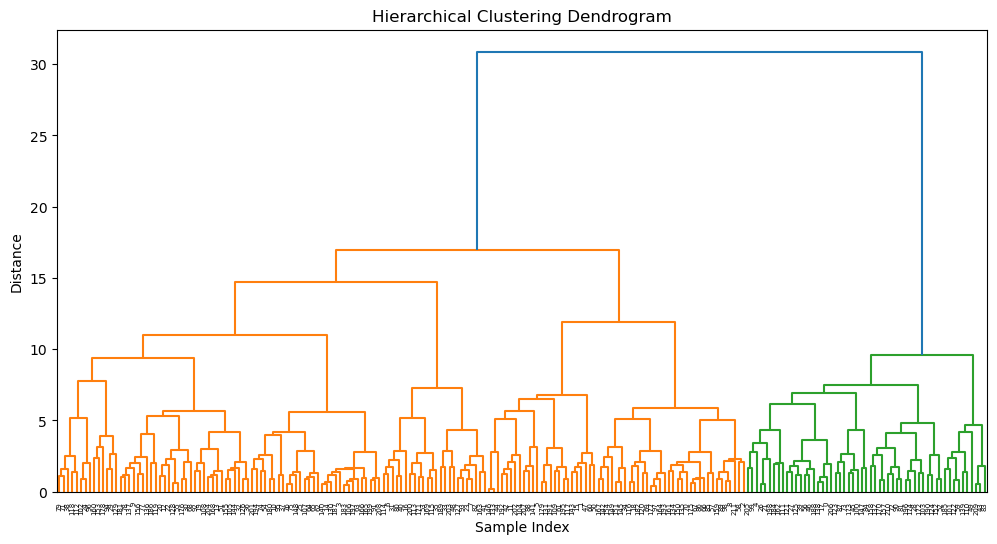

Model saved to D:\Heart_Disease_Project\models\Hierarchical_Clustering.pkl


In [11]:
# Perform Hierarchical Clustering (dendrogram analysis)

# Compute the linkage matrix
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# save model
import joblib
model_path = r"D:\Heart_Disease_Project\models\Hierarchical_Clustering.pkl"
joblib.dump(linked, model_path)
print(f"Model saved to {model_path}")

Confusion Matrix (Actual vs. Cluster):
 [[ 2 53 13 19 34]
 [13 10 10  7  2]
 [10  1  6  3  0]
 [16  0  4  2  0]
 [ 6  0  1  0  0]]
Adjusted Rand Index: 0.158


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


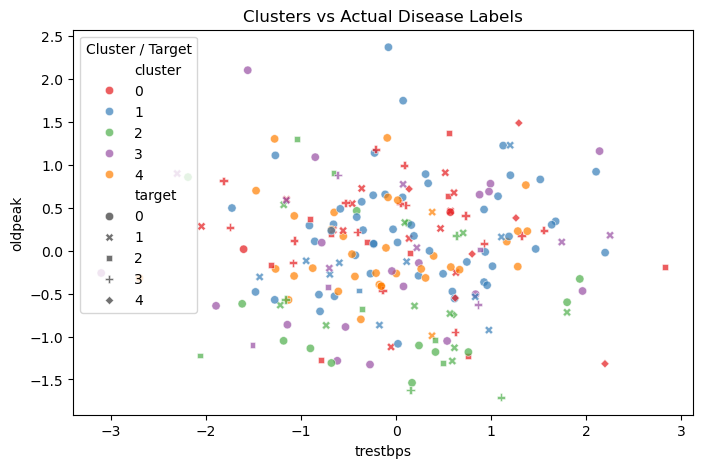

In [9]:
# Compare clusters with actual disease labels

from sklearn.metrics import confusion_matrix, adjusted_rand_score

# Fit KMeans with the chosen number of clusters (e.g., 2 for binary disease)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
data['cluster'] = clusters

# Compare clusters with actual target labels
conf_mat = confusion_matrix(data['target'], data['cluster'])
ari = adjusted_rand_score(data['target'], data['cluster'])

print("Confusion Matrix (Actual vs. Cluster):\n", conf_mat)
print(f"Adjusted Rand Index: {ari:.3f}")

# Visualize clusters vs actual labels (using first two features or PCA)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=data['cluster'], style=data['target'], palette='Set1', alpha=0.7)
plt.title('Clusters vs Actual Disease Labels')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title='Cluster / Target')